In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split




In [69]:
df = pd.read_csv("IMDB Dataset.csv")
df.shape


(50000, 2)

In [70]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: xlabel='sentiment', ylabel='count'>

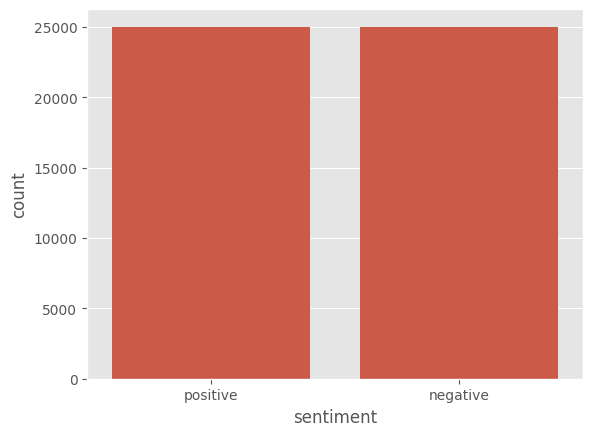

In [72]:
sns.countplot(x='sentiment',data = df)


In [73]:
for i in range(5):
    print("Review",[i])
    print(df['review'].iloc[i])
    print("Sentiment ",df['sentiment'].iloc[i],"\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [74]:
def wrd_cnt(text):
    words = text.split()
    cnt = len(words)
    return cnt


In [75]:
df['word count'] = df['review'].apply(wrd_cnt)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [76]:
df.sentiment.replace('positive',1,inplace = True)
df.sentiment.replace('negative',0,inplace = True)
df.head()


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [77]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />','',text)
    text = re.sub(r"https\S+|www\S+|http\S+",'',text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if w not in stop_words]
    return " ".join(filtered_text)


In [78]:
df.review = df['review'].apply(data_processing)

In [79]:
stemmer = PorterStemmer()
def stemming(data):
    text  = [stemmer.stem(word) for word in data]
    return data

In [80]:
df.review = df['review'].apply(lambda x:stemming(x))

In [81]:
df.drop_duplicates(inplace=True)
df.shape

(49579, 3)

In [82]:
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [83]:
df['word count'] = df['review'].apply(wrd_cnt)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [84]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


Text(0.5, 1.0, 'Most frequent words in positive review')

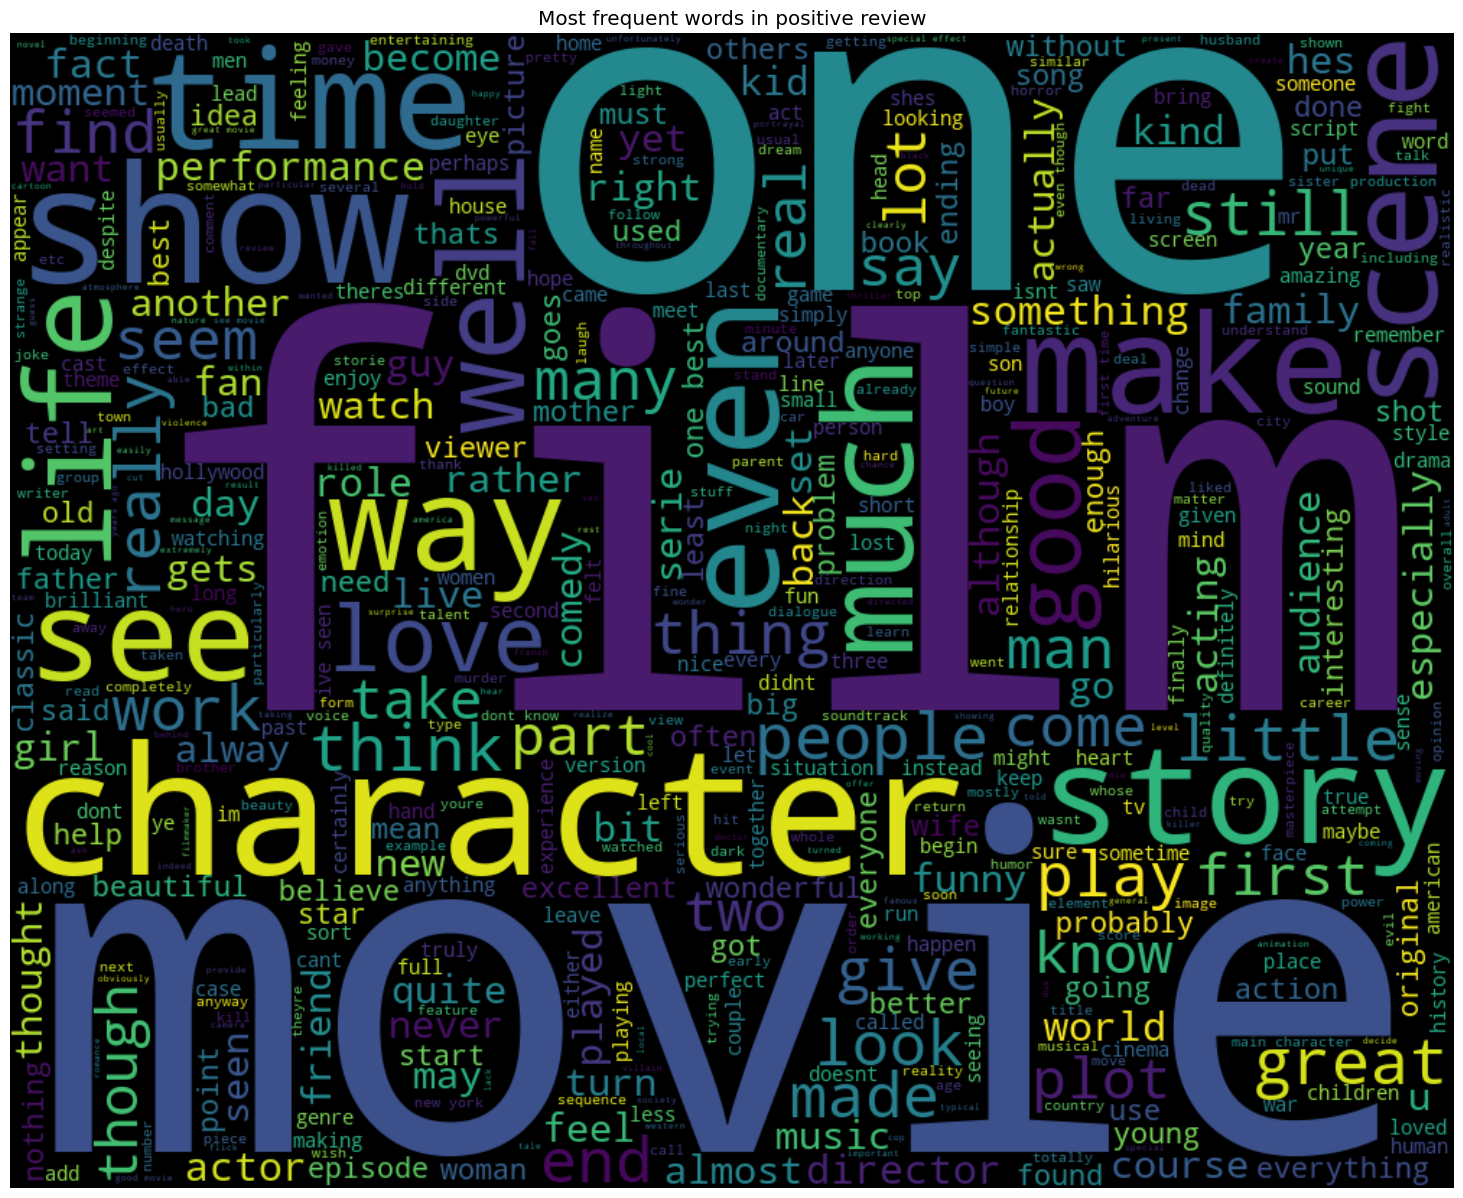

In [85]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15),facecolor = 'None')
wordcloud = WordCloud(max_words = 500,width = 1000,height = 800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive review')

In [86]:
from collections import Counter
count = Counter()
for text  in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(10)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930)]

In [87]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


Text(0.5, 1.0, 'Most frequent words in negative review')

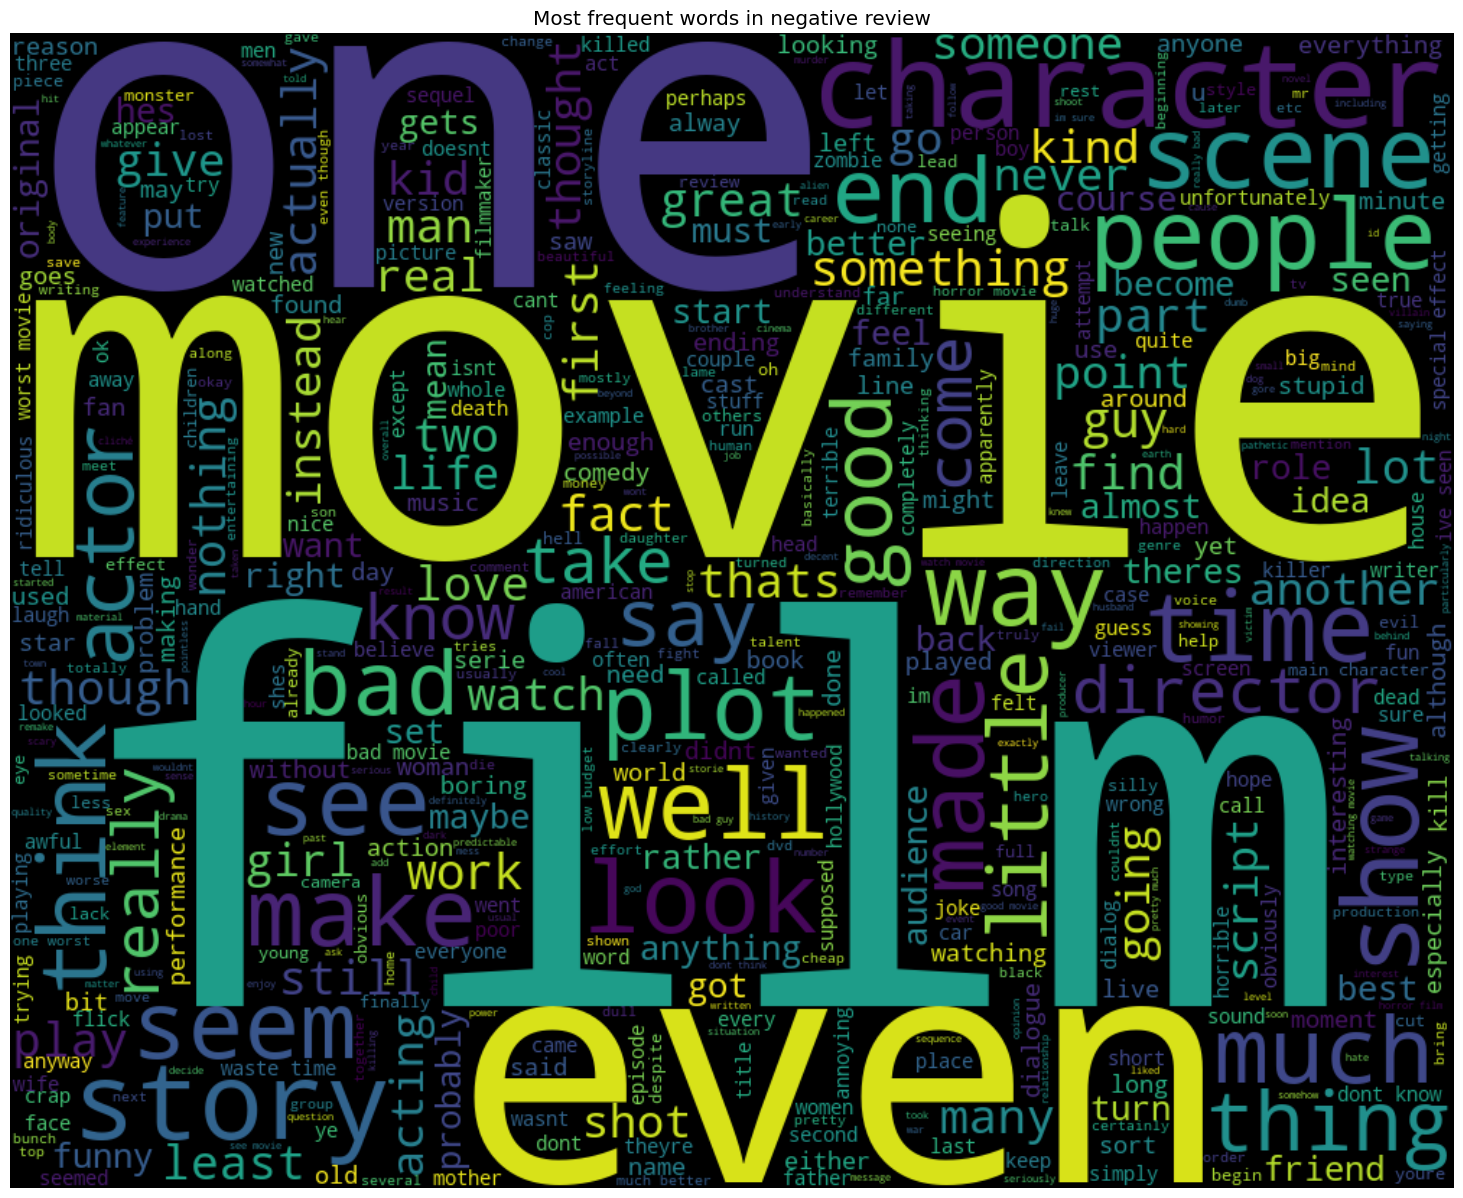

In [88]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15),facecolor = 'None')
wordcloud = WordCloud(max_words = 500,width = 1000,height = 800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative review')

In [89]:
X = df['review']
Y = df['sentiment']

In [90]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [91]:
x_train , x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [92]:
print('Size of x_train: ',(x_train.shape))
print('Size of y_train: ',(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (34705, 221707)
Size of y_train:  (34705,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [94]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_test_pred = logreg.predict(x_test)
logreg_train_pred = logreg.predict(x_train)
logreg_test_acc = accuracy_score(logreg_test_pred,y_test)
logreg_train_acc = accuracy_score(logreg_train_pred,y_train)
print("test accuracy: {: .2f}%".format(logreg_test_acc*100))

test accuracy:  89.15%


In [95]:
print(confusion_matrix(y_test,logreg_test_pred))
print("\n")
print(classification_report(y_test,logreg_test_pred))

[[6466  902]
 [ 712 6794]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7368
           1       0.88      0.91      0.89      7506

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



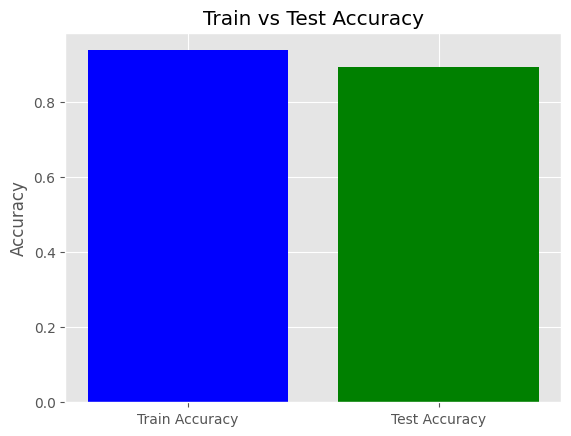

In [102]:
plt.bar(['Train Accuracy', 'Test Accuracy'], [logreg_train_acc, logreg_test_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

In [ ]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_test_pred = svc.predict(x_test)
svc_train_pred = svc.predict(x_train)
svc_test_acc = accuracy_score(svc_test_pred,y_test)
svc_train_acc = accuracy_score(svc_train_pred,y_train)
print("test accuracy: {: .2f}%".format(svc_test_acc*100))

test accuracy:  89.40%


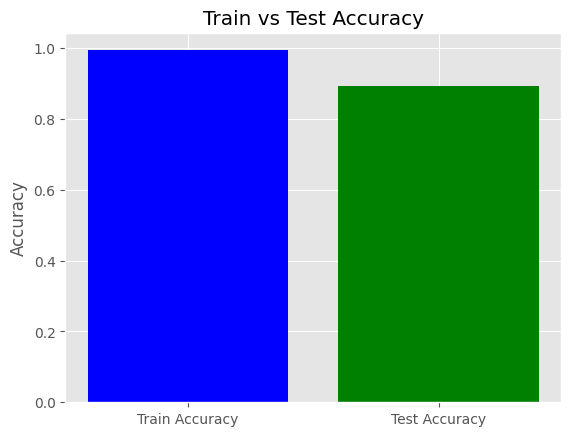

In [99]:
plt.bar(['Train Accuracy', 'Test Accuracy'], [svc_train_acc, svc_test_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

In [100]:
print(confusion_matrix(y_test,svc_test_pred))
print("\n")
print(classification_report(y_test,svc_test_pred))

[[6517  851]
 [ 726 6780]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7368
           1       0.89      0.90      0.90      7506

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svc,param_grid,refit=True , verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.5s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.892 total time=   3.0s
[CV 2/5] END ...................C=1, loss=hinge;,

,estimator,LinearSVC()
,param_grid,"{'C': [0.1, 1, ...], 'loss': ['hinge', 'squared_hinge']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [104]:
svc = LinearSVC(C = 1,loss = 'hinge')
svc.fit(x_train,y_train)
svc_test_pred = svc.predict(x_test)
svc_train_pred = svc.predict(x_train)
svc_test_acc = accuracy_score(svc_test_pred,y_test)
svc_train_acc = accuracy_score(svc_train_pred,y_train)
print("test accuracy: {: .2f}%".format(svc_test_acc*100))

test accuracy:  89.41%


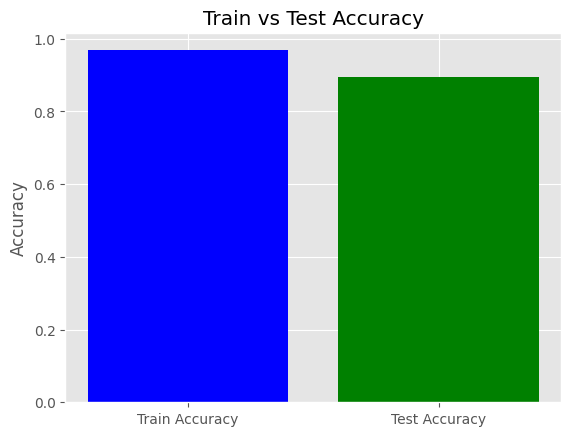

In [106]:
plt.bar(['Train Accuracy', 'Test Accuracy'], [svc_train_acc, svc_test_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

In [105]:
print(confusion_matrix(y_test,svc_test_pred))
print("\n")
print(classification_report(y_test,svc_test_pred))

[[6511  857]
 [ 718 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7368
           1       0.89      0.90      0.90      7506

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

